# Notebook for Visualizing Test/Train Results

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
file_path = 'results.txt'

In [4]:
def load_data(path):
    optimized_data = []
    dummy_data = []
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            if not line or len(line.split()) == 0:
                continue
            else:
                line_arr = line.split()
                if line_arr[0] == 'F1':
                    optimized_data.append(float(line_arr[2]))
                elif line_arr[0] == 'Random':
                    dummy_data.append(float(line_arr[4]))
    return np.array(optimized_data), np.array(dummy_data)

In [5]:
optimized_data, dummy_data = load_data(file_path)

In [6]:
def get_cdf_values(data, label='default label'):
    x = np.sort(data)
    s = np.sum(x)
    p = x / s
    y = np.cumsum(p)
    return x, y, label

In [7]:
def plot_cdf(data, title='Add a title', xlabel='Add an xlabel', ylabel='Add a ylabel'):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for dataset in data:
        x, y, label = dataset
        plt.plot(x, y, label=label)
    plt.legend()
    plt.show()

In [8]:
xlabel = 'F1 Test Score'
ylabel = 'Probability'
title = 'Node Classification with Linear Regressors'

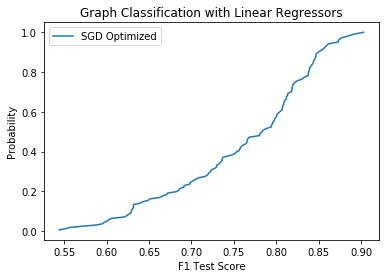

In [9]:
dataset1 = get_cdf_values(optimized_data, label='SGD Optimized')
plot_cdf([dataset1], title=title, xlabel=xlabel, ylabel=ylabel)

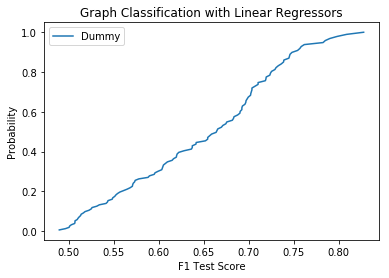

In [10]:
dataset2 = get_cdf_values(dummy_data, label='Dummy')
plot_cdf([dataset2], title=title, xlabel=xlabel, ylabel=ylabel)

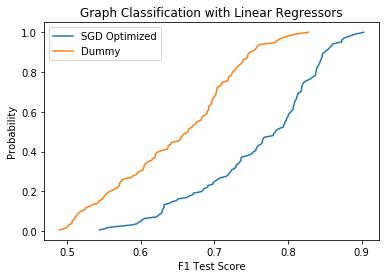

In [11]:
plot_cdf([dataset1, dataset2], title=title, xlabel=xlabel, ylabel=ylabel)

In [ ]:
file_path = 'results_tda.txt'

In [ ]:
optimized_tda_data, dummy_tda_data = load_data(file_path)

In [ ]:
title = 'TDA enhanced Node Classification with Linear Regressors'
dataset3 = get_cdf_values(optimized_tda_data, label='SGD Optimized with TDA')
plot_cdf([dataset3], title=title, xlabel=xlabel, ylabel=ylabel)

In [ ]:
dataset4 = get_cdf_values(dummy_tda_data, label='Dummy with TDA')
plot_cdf([dataset4], title=title, xlabel=xlabel, ylabel=ylabel)

In [ ]:
plot_cdf([dataset3, dataset4], title=title, xlabel=xlabel, ylabel=ylabel)

In [ ]:
title = 'Baseline vs. TDA Enhanced Embeddings for Node Classification'
plot_cdf([dataset1, dataset2, dataset3, dataset4], title=title, xlabel=xlabel, ylabel=ylabel)